**This Notebook is written by: Ghefira Nur Fatimah Widyasari**

# IMPORT DATA

In [2]:
# Import File
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transaction = pd.read_csv('Case Study - Transaction.csv', sep=';')
customer = pd.read_csv('Case Study - Customer.csv', sep=';')
product = pd.read_csv('Case Study - Product.csv', sep=';')
store = pd.read_csv('Case Study - Store.csv', sep=';')

# PREPROCESSING & EDA - TRANSACTION

In [3]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [4]:
transaction.shape

(5020, 8)

In [5]:
# Informasi data
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


Kita perlu untuk mengubah CustomerID, ProductID, dan StoreID menjadi string, serta Date menjadi format datetime

In [6]:
# Mengubah tipe data kolom CustomerID, ProductID, dan StoreID menjadi string
transaction['CustomerID'] = transaction['CustomerID'].astype(str)
transaction['ProductID'] = transaction['ProductID'].astype(str)
transaction['StoreID'] = transaction['StoreID'].astype(str)

# Mengubah tipe data kolom Date menjadi format datetime
transaction['Date'] = pd.to_datetime(transaction['Date'], format='%d/%m/%Y')

# Menampilkan informasi tipe data setelah perubahan
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   object        
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 313.9+ KB


In [7]:
# Statistik deskriptif
transaction.describe()

,Price,Qty,TotalAmount
count,5020.000000,5020.000000,5020.000000
mean,9684.800797,3.644622,32279.482072
std,4600.708780,1.855295,19675.462455
min,3200.000000,1.000000,7500.000000
25%,4200.000000,2.000000,16000.000000
50%,9400.000000,3.000000,28200.000000
75%,15000.000000,5.000000,47000.000000
max,18000.000000,10.000000,88000.000000


In [8]:
# Menampilkan jumlah unik dari setiap kolom string
categorical_columns = ['TransactionID', 'CustomerID', 'ProductID', 'StoreID']
for col in categorical_columns:
    unique_values = transaction[col].nunique()
    print(f'Jumlah unik {col}: {unique_values}')

Jumlah unik TransactionID: 4908
Jumlah unik CustomerID: 447
Jumlah unik ProductID: 10
Jumlah unik StoreID: 14


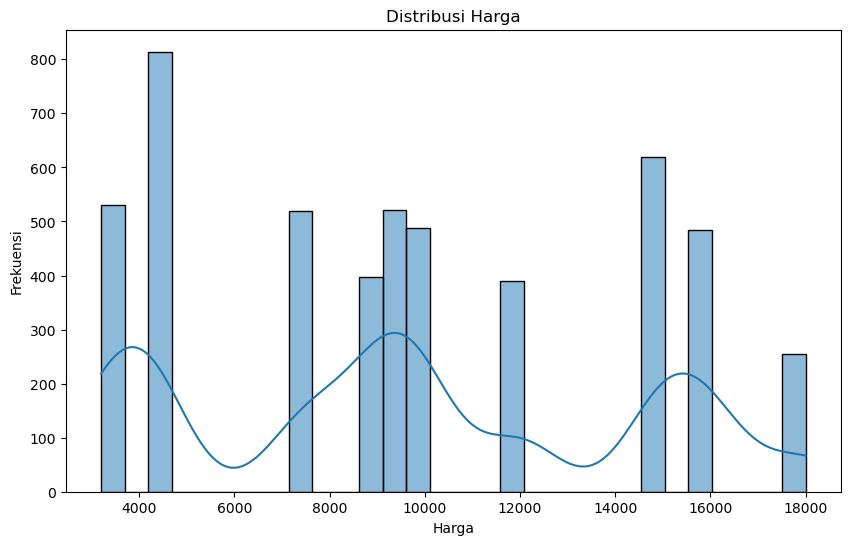

In [9]:
# Histogram untuk kolom Price
plt.figure(figsize=(10, 6))
sns.histplot(transaction['Price'], bins=30, kde=True)
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.title('Distribusi Harga')
plt.show()

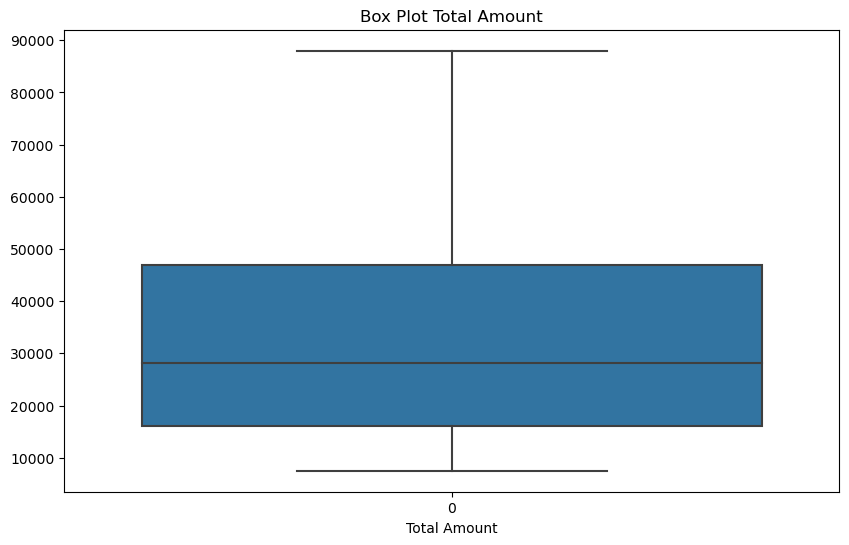

In [10]:
# Box plot untuk Total Amount
plt.figure(figsize=(10, 6))
sns.boxplot(transaction['TotalAmount'])
plt.xlabel('Total Amount')
plt.title('Box Plot Total Amount')
plt.show()

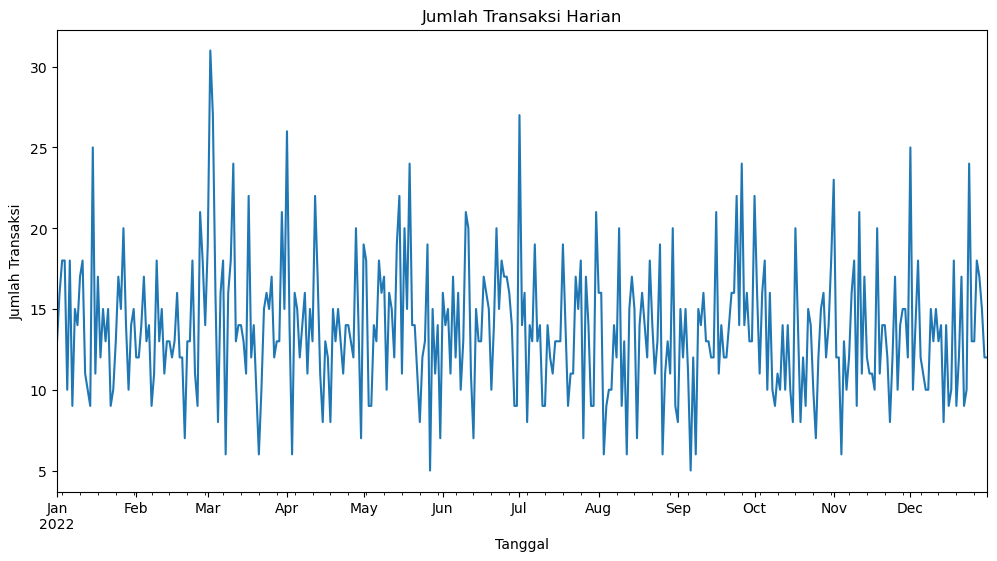

In [11]:
# Visualisasi jumlah transaksi per tanggal
daily_transactions = transaction.groupby('Date').size()
plt.figure(figsize=(12, 6))
daily_transactions.plot(kind='line')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi Harian')
plt.show()

Text(20, -30, 'Min: 343')

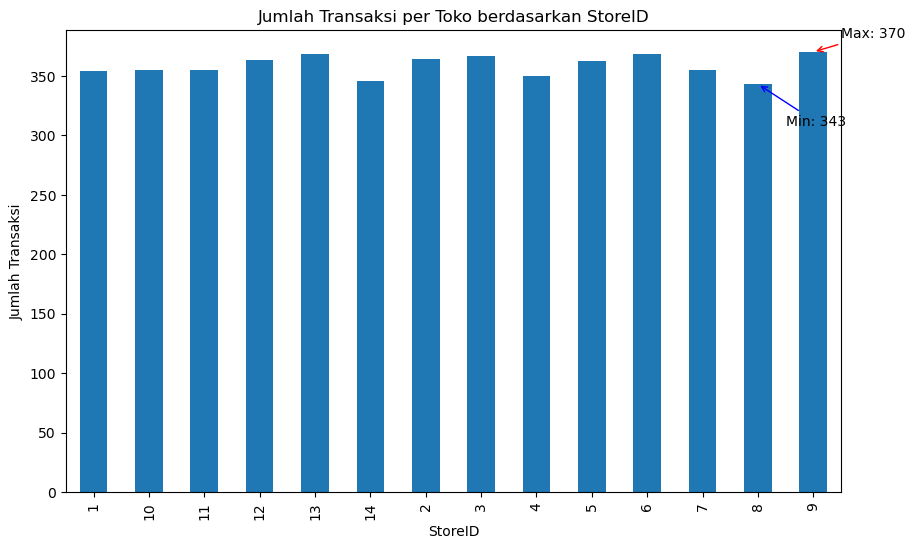

In [12]:
# Visualisasi jumlah transaksi per store
store_transactions = transaction.groupby('StoreID').size()
plt.figure(figsize=(10, 6))
ax = store_transactions.plot(kind='bar')
plt.xlabel('StoreID')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi per Toko berdasarkan StoreID')

# Temukan indeks batang dengan jumlah transaksi terbanyak
max_transaction_index = store_transactions.idxmax()

# Temukan posisi indeks di dalam DataFrame
pos_max = store_transactions.index.get_loc(max_transaction_index)

# Temukan indeks batang dengan jumlah transaksi terendah
min_transaction_index = store_transactions.idxmin()

# Temukan posisi indeks di dalam DataFrame
pos_min = store_transactions.index.get_loc(min_transaction_index)

# Tambahkan penanda pada batang terbanyak
max_transaction_value = store_transactions[max_transaction_index]
ax.annotate(f'Max: {max_transaction_value}', (pos_max, max_transaction_value), xytext=(20, 10),
            textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))

# Tambahkan penanda pada batang terendah
min_transaction_value = store_transactions[min_transaction_index]
ax.annotate(f'Min: {min_transaction_value}', (pos_min, min_transaction_value), xytext=(20, -30),
            textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13976\1797586977.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = transaction.corr()


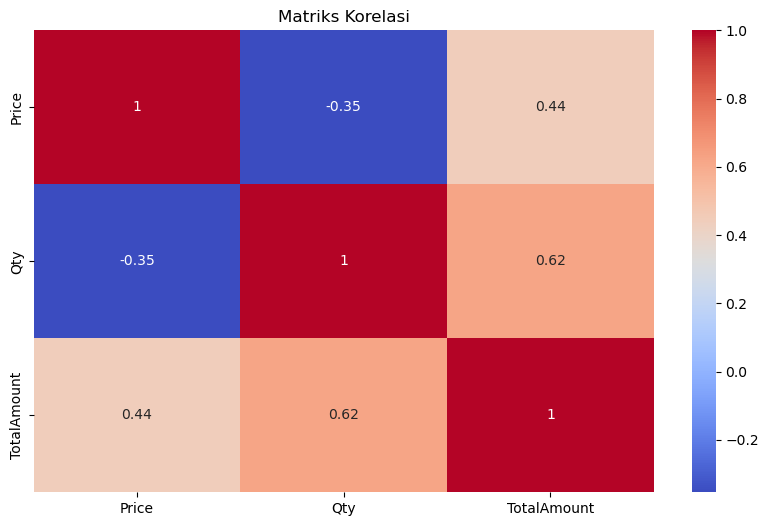

In [13]:
# Korelasi antara kolom numerik
correlation_matrix = transaction.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

In [14]:
Q1 = transaction['TotalAmount'].quantile(0.25)
Q3 = transaction['TotalAmount'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = transaction[(transaction['TotalAmount'] < lower_bound) | (transaction['TotalAmount'] > upper_bound)]

print("Outlier:")
print(outliers)

Outlier:
Empty DataFrame
Columns: [TransactionID, CustomerID, Date, ProductID, Price, Qty, TotalAmount, StoreID]
Index: []


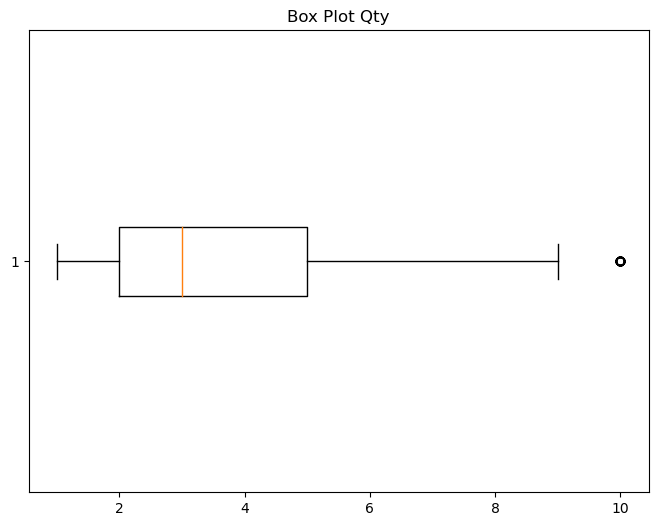

Outlier Qty:
     TransactionID CustomerID       Date ProductID  Price  Qty  TotalAmount  \
27          TR7826        181 2022-01-02        P1   8800   10        88000   
328         TR3218         91 2022-01-24        P1   8800   10        88000   
478        TR97763        406 2022-02-03        P1   8800   10        88000   
736        TR81816        120 2022-02-23        P1   8800   10        88000   
774        TR65685         68 2022-02-26        P1   8800   10        88000   
944        TR85821         89 2022-03-07        P1   8800   10        88000   
985        TR77331         73 2022-03-10        P1   8800   10        88000   
1071       TR69907         51 2022-03-16        P1   8800   10        88000   
1173        TR4617        422 2022-03-24        P1   8800   10        88000   
1270       TR90952         37 2022-03-30        P1   8800   10        88000   
1560       TR28093        391 2022-04-22        P1   8800   10        88000   
1823       TR36057        157 2022-05-1

In [15]:
Q1_qty = transaction['Qty'].quantile(0.25)
Q3_qty = transaction['Qty'].quantile(0.75)

IQR_qty = Q3_qty - Q1_qty

lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty

outliers_qty = transaction[(transaction['Qty'] < lower_bound_qty) | (transaction['Qty'] > upper_bound_qty)]

plt.figure(figsize=(8, 6))
plt.boxplot(transaction['Qty'], vert=False)
plt.title('Box Plot Qty')
plt.show()

print("Outlier Qty:")
print(outliers_qty)

In [16]:
# Mengecek duplikat pada kolom 'TransactionID'
duplicate_customers = transaction['TransactionID'].duplicated()

# Menampilkan hasil
print("Terdapat duplikat TransactionID:", duplicate_customers.any())

Terdapat duplikat TransactionID: True


In [17]:
# Mengecek duplikat pada kolom 'TransactionID'
duplicate_transaction = transaction[transaction['TransactionID'].duplicated(keep=False)]

# Menampilkan data yang memiliki 'TransactionID' yang sama
duplicate_transaction

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
6,TR54287,51,2022-01-01,P8,16000,2,32000,2
17,TR26678,321,2022-01-02,P6,18000,3,54000,12
21,TR34291,333,2022-01-02,P7,9400,2,18800,7
52,TR41140,78,2022-01-04,P9,10000,2,20000,14
74,TR84132,22,2022-01-05,P9,10000,7,70000,14
...,...,...,...,...,...,...,...,...
4876,TR91651,197,2022-12-21,P5,4200,2,8400,7
4910,TR57273,376,2022-12-24,P8,16000,1,16000,11
4916,TR75968,209,2022-12-24,P9,10000,7,70000,13
4921,TR18138,375,2022-12-25,P3,7500,6,45000,4


In [18]:
duplicate_transaction[duplicate_transaction['TransactionID'] == 'TR54287']

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
6,TR54287,51,2022-01-01,P8,16000,2,32000,2
3117,TR54287,15,2022-08-14,P9,10000,3,30000,1


Didapat ada 223 transaction id yang berulang, padahal seharusnya unik. Oleh karena itu perlu kita drop dan memilih transaction id yang terbaru berdasarkan tanggal transaksinya.

In [19]:
# Urutkan tabel berdasarkan 'Date' secara descending
transaction = transaction.sort_values(by='Date', ascending=False)

# Hapus duplikat 'TransactionID' dengan hanya menyimpan yang paling baru
transaction = transaction.drop_duplicates(subset='TransactionID', keep='first')

# Mengecek duplikat pada kolom 'TransactionID'
duplicate_transaction = transaction[transaction['TransactionID'].duplicated(keep=False)]

# Menampilkan data yang memiliki 'TransactionID' yang sama
duplicate_transaction

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID


Data duplicate sudah berhasil di drop, sehingga sudah tidak ada data yang duplicate pada kolom TransactionID

In [20]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 5019 to 0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  4908 non-null   object        
 1   CustomerID     4908 non-null   object        
 2   Date           4908 non-null   datetime64[ns]
 3   ProductID      4908 non-null   object        
 4   Price          4908 non-null   int64         
 5   Qty            4908 non-null   int64         
 6   TotalAmount    4908 non-null   int64         
 7   StoreID        4908 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 345.1+ KB


Setelah duplicate di drop, jumlah row sebanyak 4908 dari yang sebelumnya 5020

# PREPROCESSING & EDA DATA - CUSTOMER

In [21]:
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [22]:
customer.shape

(447, 5)

In [23]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


Kita perlu untuk mengubah Gender dan CustomerID menjadi string, income menjadi int64. Namun, income perlu diubah terlebih dahulu tanda koma menjadi tanda titik

In [24]:
# Mengganti koma (,) dengan titik (.) pada kolom 'Income'
customer['Income'] = customer['Income'].str.replace(',', '.')

# Mengubah tipe data kolom 'Income' menjadi float
customer['Income'] = customer['Income'].astype(float)

In [25]:
# Mengubah tipe data kolom CustomerID dan Gender menjadi string
customer['Gender'] = customer['Gender'].astype(str)
customer['CustomerID'] = customer['CustomerID'].astype(str)

# Menampilkan informasi tipe data setelah perubahan
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    object 
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    object 
 3   Marital Status  444 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 17.6+ KB


In [26]:
# Statistik deskriptif
customer.describe()

,Age,Income
count,447.000000,447.000000
mean,39.782998,8.592103
std,12.848719,6.607065
min,0.000000,0.000000
25%,30.000000,4.175000
50%,39.000000,7.520000
75%,50.500000,10.810000
max,72.000000,71.300000


In [27]:
# Menampilkan jumlah unik dari setiap kolom string
string_columns = ['CustomerID', 'Gender', 'Marital Status']
for col in string_columns:
    unique_values = customer[col].nunique()
    print(f'Jumlah unik {col}: {unique_values}')

Jumlah unik CustomerID: 447
Jumlah unik Gender: 2
Jumlah unik Marital Status: 2


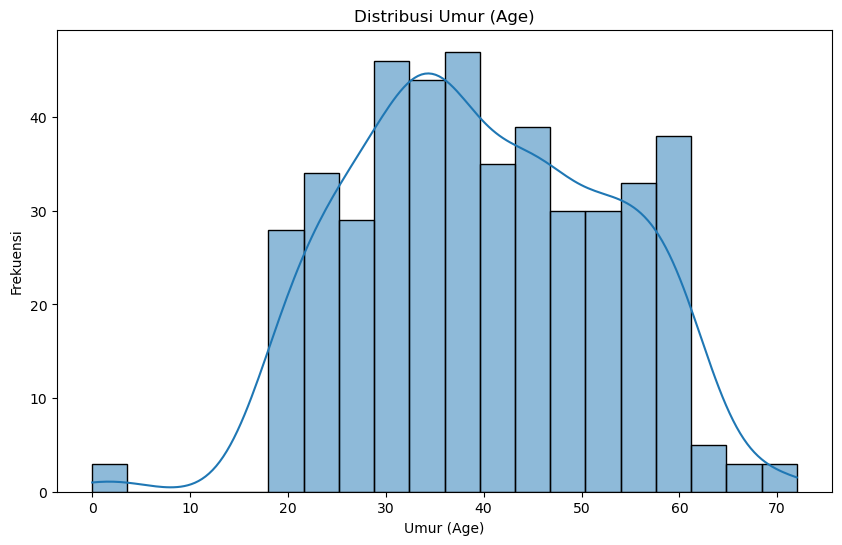

In [28]:
# Distribusi Umur (Age)
plt.figure(figsize=(10, 6))
sns.histplot(data=customer, x='Age', bins=20, kde=True)
plt.title('Distribusi Umur (Age)')
plt.xlabel('Umur (Age)')
plt.ylabel('Frekuensi')
plt.show()

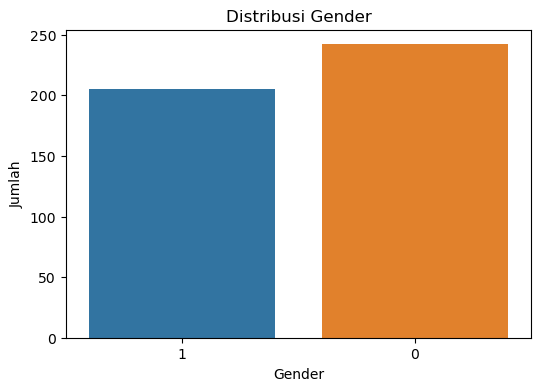

In [29]:
# Distribusi Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=customer, x='Gender')
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

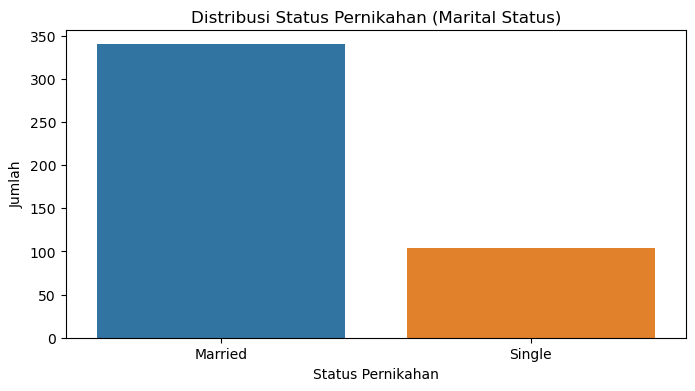

In [30]:
# Distribusi Status Pernikahan (Marital Status)
plt.figure(figsize=(8, 4))
sns.countplot(data=customer, x='Marital Status')
plt.title('Distribusi Status Pernikahan (Marital Status)')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah')
plt.show()

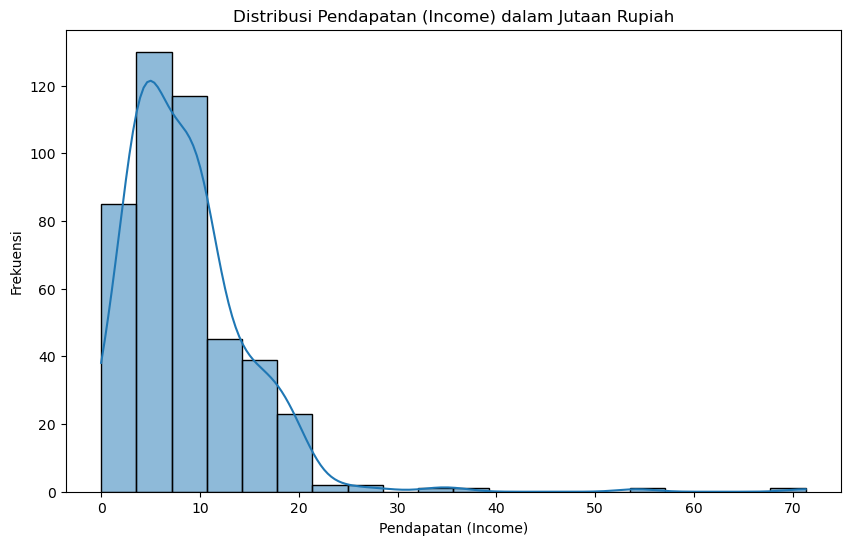

In [31]:
# Distribusi Pendapatan (Income)
plt.figure(figsize=(10, 6))
sns.histplot(data=customer, x='Income', bins=20, kde=True)
plt.title('Distribusi Pendapatan (Income) dalam Jutaan Rupiah')
plt.xlabel('Pendapatan (Income)')
plt.ylabel('Frekuensi')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13976\3905571852.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = customer.corr()


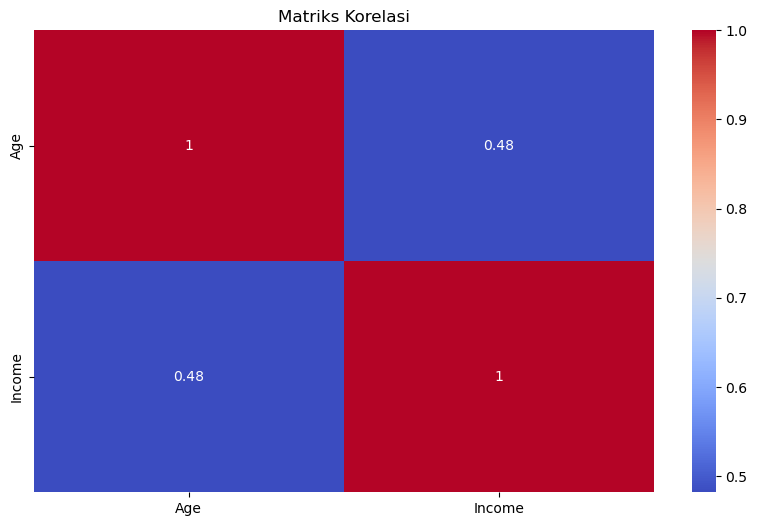

In [32]:
# Korelasi antara kolom numerik
correlation_matrix = customer.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

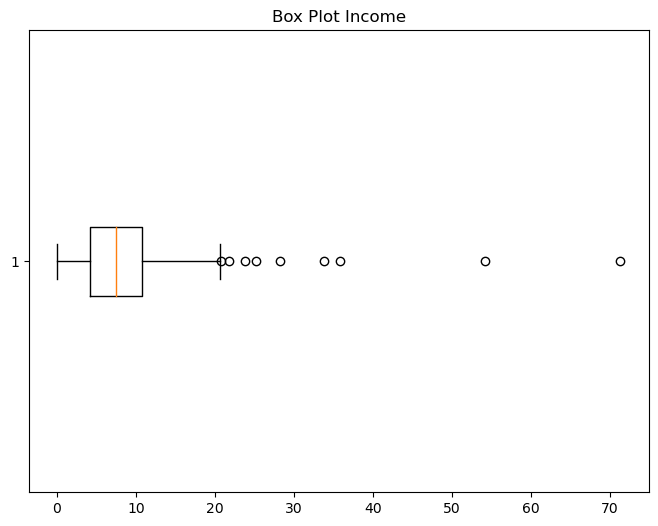

Outlier Income:
    CustomerID  Age Gender Marital Status  Income
100        101   61      1        Married   54.20
112        113   57      0        Married   71.30
132        133   47      1        Married   20.81
187        188   46      1        Married   25.22
245        246   40      1         Single   21.81
359        360   54      0        Married   35.78
398        399   52      1         Single   33.77
408        409   47      0        Married   28.23
417        418   45      0         Single   23.84


In [33]:
Q1_Income = customer['Income'].quantile(0.25)
Q3_Income = customer['Income'].quantile(0.75)

IQR_Income = Q3_Income - Q1_Income

lower_bound_Income = Q1_Income - 1.5 * IQR_Income
upper_bound_Income = Q3_Income + 1.5 * IQR_Income

outliers_income = customer[(customer['Income'] < lower_bound_Income) | (customer['Income'] > upper_bound_Income)]

plt.figure(figsize=(8, 6))
plt.boxplot(customer['Income'], vert=False)
plt.title('Box Plot Income')
plt.show()

print("Outlier Income:")
print(outliers_income)

In [34]:
def age_group(Age):
    if Age < 15:
        return '< 15'
    elif Age <= 24:
        return '15 - 24'
    elif Age <= 34:
        return '25 - 34'
    elif Age <= 44:
        return '35 - 44'
    elif Age <= 54:
        return '45 - 54'
    elif Age <= 64:
        return '55 - 64'
    else:
        return '> 65'

# Menerapkan fungsi untuk membuat kolom "Age_Group" baru
customer['Age_Group'] = customer['Age'].apply(age_group)

# Menampilkan DataFrame hasil
customer

,CustomerID,Age,Gender,Marital Status,Income,Age_Group
0,1,55,1,Married,5.12,55 - 64
1,2,60,1,Married,6.23,55 - 64
2,3,32,1,Married,9.17,25 - 34
3,4,31,1,Married,4.87,25 - 34
4,5,58,1,Married,3.57,55 - 64
...,...,...,...,...,...,...
442,443,33,1,NaN,9.28,25 - 34
443,444,53,0,Married,15.31,45 - 54
444,445,51,0,Married,14.48,45 - 54
445,446,57,0,Married,7.81,55 - 64


# PREPROCESSING & EDA DATA - PRODUCT

In [35]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [36]:
product.shape

(10, 3)

In [37]:
# Informasi data
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


Format sudah benar semua, tidak ada yang perlu diubah

In [38]:
# Statistik deskriptif
product.describe()

,Price
count,10.000000
mean,10410.000000
std,4890.455557
min,3200.000000
25%,7825.000000
50%,9700.000000
75%,14250.000000
max,18000.000000


In [39]:
# Menampilkan jumlah unik dari setiap kolom string
string_columns = ['ProductID', 'Product Name']
for col in string_columns:
    unique_values = product[col].nunique()
    print(f'Jumlah unik {col}: {unique_values}')

Jumlah unik ProductID: 10
Jumlah unik Product Name: 10


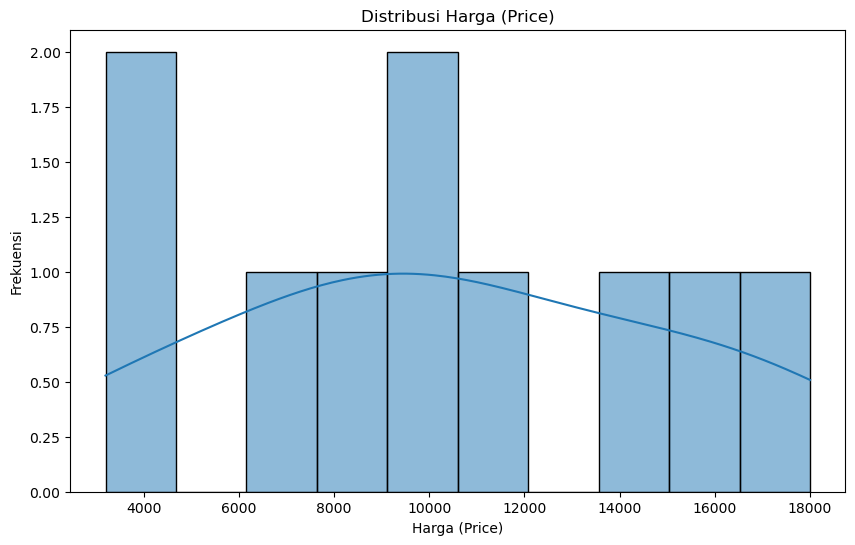

In [40]:
# Distribusi Harga (Price)
plt.figure(figsize=(10, 6))
sns.histplot(data=product, x='Price', bins=10, kde=True)
plt.title('Distribusi Harga (Price)')
plt.xlabel('Harga (Price)')
plt.ylabel('Frekuensi')
plt.show()

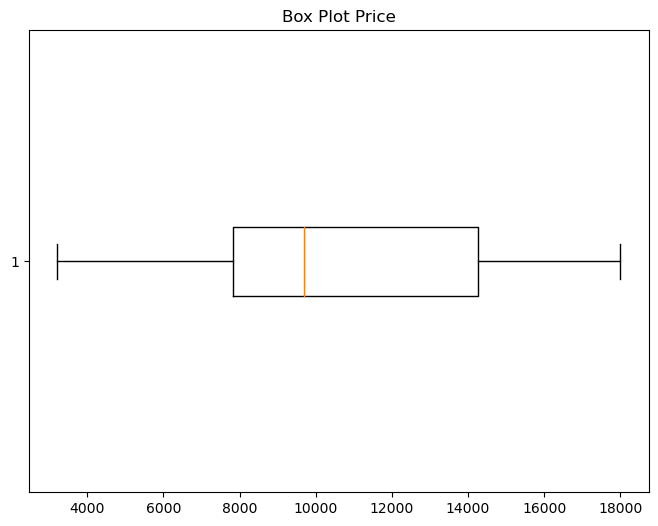

Outlier Price:
Empty DataFrame
Columns: [ProductID, Product Name, Price]
Index: []


In [41]:
Q1_price = product['Price'].quantile(0.25)
Q3_price = product['Price'].quantile(0.75)

IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

outliers_price = product[(product['Price'] < lower_bound_price) | (product['Price'] > upper_bound_price)]

plt.figure(figsize=(8, 6))
plt.boxplot(product['Price'], vert=False)
plt.title('Box Plot Price')
plt.show()

print("Outlier Price:")
print(outliers_price)

# PREPROCESSING & EDA DATA - STORE

In [42]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [43]:
store.shape

(14, 6)

In [44]:
# Informasi data
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


Kita perlu untuk mengubah StoreID menjadi string, serta Latitude dan Longitude menjadi float

In [45]:
#Mengganti "," menjadi "."
store['Latitude'] = store['Latitude'].str.replace(',', '.')
store['Longitude'] = store['Longitude'].str.replace(',', '.')
store

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.2,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845
5,6,Lingga,Lingga,Modern Trade,-5.135399,119.42379
6,7,Buana Indah,Buana,General Trade,3.316694,114.590111
7,8,Sinar Harapan,Harapan Baru,General Trade,5.54829,95.323753
8,9,Lingga,Lingga,Modern Trade,-3.654703,128.190643
9,10,Harapan Baru,Harapan Baru,General Trade,3.597031,98.678513


In [46]:
# Mengubah tipe data kolom StoreID, Latitude, dan Longitude menjadi string
store['StoreID'] = store['StoreID'].astype(str)
store['Latitude'] = store['Latitude'].astype(float)
store['Longitude'] = store['Longitude'].astype(float)

# Menampilkan informasi tipe data setelah perubahan
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     object 
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), object(4)
memory usage: 800.0+ bytes


In [47]:
# Menampilkan jumlah unik dari setiap kolom string
string_columns = ['StoreID', 'StoreName', 'GroupStore', 'Type']
for col in string_columns:
    unique_values = store[col].nunique()
    print(f'Jumlah unik {col}: {unique_values}')

Jumlah unik StoreID: 14
Jumlah unik StoreName: 12
Jumlah unik GroupStore: 7
Jumlah unik Type: 2


Terdapat dua toko yang memiliki ID berbeda

# MERGED DATA

In [48]:
# Melakukan left join antara transaction dan store berdasarkan kolom StoreID
merged_data = pd.merge(transaction, store, on="StoreID", how="left")

# Melakukan left join antara merged_data dan customer berdasarkan kolom CustomerID
merged_data = pd.merge(merged_data, customer, on="CustomerID", how="left")

# Melakukan left join antara merged_data dan product berdasarkan kolom ProductID
merged_data = pd.merge(merged_data, product, on="ProductID", how="left")

# Menampilkan contoh hasil gabungan
print("Hasil Gabungan dari Transaction, Store, Customer, dan Product:")
merged_data

Hasil Gabungan dari Transaction, Store, Customer, dan Product:


,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income,Age_Group,Product Name,Price_y
0,TR85684,55,2022-12-31,P8,16000,1,16000,6,Lingga,Lingga,Modern Trade,-5.135399,119.423790,34,1,Married,8.44,25 - 34,Oat,16000
1,TR38129,253,2022-12-31,P3,7500,5,37500,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664,37,0,Married,4.32,35 - 44,Crackers,7500
2,TR12821,203,2022-12-31,P3,7500,1,7500,10,Harapan Baru,Harapan Baru,General Trade,3.597031,98.678513,53,0,Married,17.20,45 - 54,Crackers,7500
3,TR13635,408,2022-12-31,P7,9400,4,37600,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529,34,1,Married,9.45,25 - 34,Coffee Candy,9400
4,TR1380,266,2022-12-31,P9,10000,3,30000,11,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,72,1,Married,4.72,> 65,Yoghurt,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,TR7596,270,2022-01-01,P7,9400,2,18800,14,Priangan,Priangan,Modern Trade,-5.450000,105.266670,49,1,Married,8.81,45 - 54,Coffee Candy,9400
4904,TR97336,233,2022-01-01,P7,9400,2,18800,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,43,1,Married,5.69,35 - 44,Coffee Candy,9400
4905,TR99839,123,2022-01-01,P2,3200,6,19200,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,34,0,Married,4.36,25 - 34,Ginger Candy,3200
4906,TR16356,165,2022-01-01,P9,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,44,1,Married,14.58,35 - 44,Yoghurt,10000


# REMOVE OUTLIER FROM MERGED DATA FOR ARIMA REGRESSION

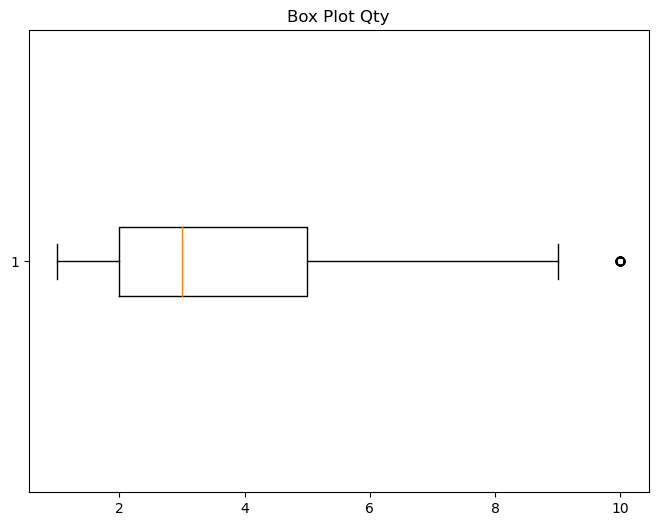

Outlier mg:
     TransactionID CustomerID       Date ProductID  Price_x  Qty  TotalAmount  \
55         TR89226        100 2022-12-28        P1     8800   10        88000   
87         TR47625        121 2022-12-25        P1     8800   10        88000   
283        TR20265        402 2022-12-10        P1     8800   10        88000   
502         TR7307        353 2022-11-25        P1     8800   10        88000   
550        TR29808        138 2022-11-20        P1     8800   10        88000   
585        TR53237        105 2022-11-18        P1     8800   10        88000   
747         TR6757        364 2022-11-06        P1     8800   10        88000   
1062       TR87413        303 2022-10-12        P1     8800   10        88000   
1193       TR40987         69 2022-10-01        P1     8800   10        88000   
1434       TR79050        317 2022-09-16        P1     8800   10        88000   
1466       TR73044         11 2022-09-14        P1     8800   10        88000   
1497       TR309

In [49]:
Q1_mg = merged_data['Qty'].quantile(0.25)
Q3_mg = merged_data['Qty'].quantile(0.75)

IQR_mg = Q3_mg - Q1_mg

lower_bound_mg = Q1_mg - 1.5 * IQR_mg
upper_bound_mg = Q3_mg + 1.5 * IQR_mg

outliers_mg = merged_data[(merged_data['Qty'] < lower_bound_mg) | (merged_data['Qty'] > upper_bound_mg)]

plt.figure(figsize=(8, 6))
plt.boxplot(merged_data['Qty'], vert=False)
plt.title('Box Plot Qty')
plt.show()

print("Outlier mg:")
print(outliers_mg)

Terdapat 41 outlier, outlier dihapus karena dapat memberikan akurasi yang lebih buruk jika tidak dihapus

In [50]:
# Identifikasi outlier menggunakan IQR
Q1 = merged_data['Qty'].quantile(0.25)
Q3 = merged_data['Qty'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus baris yang mengandung outlier
merged_data2 = merged_data[(merged_data['Qty'] >= lower_bound) & (merged_data['Qty'] <= upper_bound)]

In [51]:
merged_data2

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income,Age_Group,Product Name,Price_y
0,TR85684,55,2022-12-31,P8,16000,1,16000,6,Lingga,Lingga,Modern Trade,-5.135399,119.423790,34,1,Married,8.44,25 - 34,Oat,16000
1,TR38129,253,2022-12-31,P3,7500,5,37500,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664,37,0,Married,4.32,35 - 44,Crackers,7500
2,TR12821,203,2022-12-31,P3,7500,1,7500,10,Harapan Baru,Harapan Baru,General Trade,3.597031,98.678513,53,0,Married,17.20,45 - 54,Crackers,7500
3,TR13635,408,2022-12-31,P7,9400,4,37600,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529,34,1,Married,9.45,25 - 34,Coffee Candy,9400
4,TR1380,266,2022-12-31,P9,10000,3,30000,11,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,72,1,Married,4.72,> 65,Yoghurt,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,TR7596,270,2022-01-01,P7,9400,2,18800,14,Priangan,Priangan,Modern Trade,-5.450000,105.266670,49,1,Married,8.81,45 - 54,Coffee Candy,9400
4904,TR97336,233,2022-01-01,P7,9400,2,18800,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,43,1,Married,5.69,35 - 44,Coffee Candy,9400
4905,TR99839,123,2022-01-01,P2,3200,6,19200,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,34,0,Married,4.36,25 - 34,Ginger Candy,3200
4906,TR16356,165,2022-01-01,P9,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,44,1,Married,14.58,35 - 44,Yoghurt,10000


In [52]:
merged_data = merged_data2

# REGRESI ARIMA

In [53]:
# Mengubah kolom "Date" menjadi tipe data datetime jika belum
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Mengelompokkan data berdasarkan kolom "Date" dan menghitung jumlah "Qty"
data_regresi = merged_data.groupby('Date')['Qty'].sum().reset_index()

# Menampilkan hasil
data_regresi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13976\1606099684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Date'] = pd.to_datetime(merged_data['Date'])


,Date,Qty
0,2022-01-01,47
1,2022-01-02,44
2,2022-01-03,63
3,2022-01-04,43
4,2022-01-05,23
...,...,...
360,2022-12-27,70
361,2022-12-28,58
362,2022-12-29,42
363,2022-12-30,44


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Pisahkan data menjadi dua bagian: data pelatihan (train) dan data pengujian (test). Data pelatihan digunakan untuk melatih model ARIMA, sementara data pengujian digunakan untuk menguji performa model.

In [55]:
# Memisahkan data menjadi data pelatihan (train) dan data pengujian (test)
train_size = int(len(data_regresi) * 0.8)
train_data = data_regresi[:train_size]
test_data = data_regresi[train_size:]

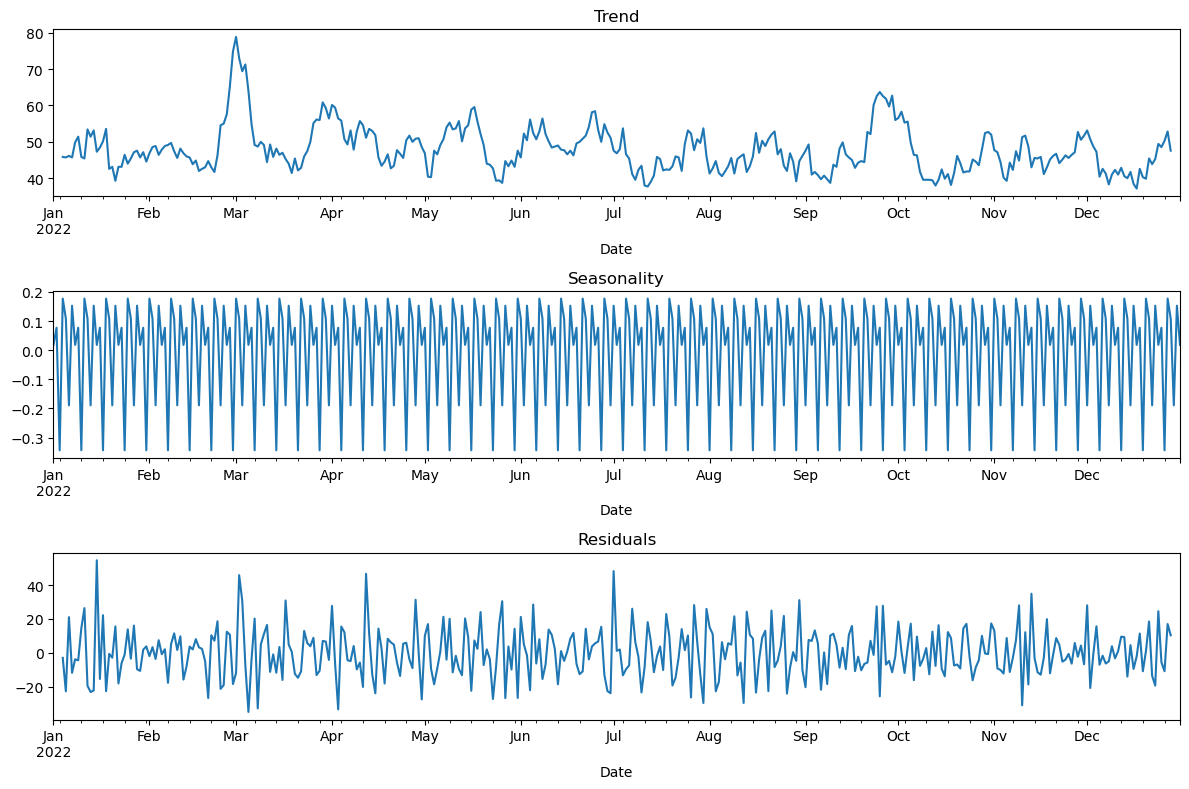

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Melakukan decompose pada data
decomposed = seasonal_decompose(data_regresi.set_index('Date'))

plt.figure(figsize=(12, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [57]:
train_data

,Date,Qty
0,2022-01-01,47
1,2022-01-02,44
2,2022-01-03,63
3,2022-01-04,43
4,2022-01-05,23
...,...,...
287,2022-10-15,33
288,2022-10-16,26
289,2022-10-17,53
290,2022-10-18,47


In [58]:
test_data

,Date,Qty
292,2022-10-20,39
293,2022-10-21,35
294,2022-10-22,56
295,2022-10-23,59
296,2022-10-24,39
...,...,...
360,2022-12-27,70
361,2022-12-28,58
362,2022-12-29,42
363,2022-12-30,44


Lakukan analisis awal pada data time series, seperti plotting data, identifikasi tren, dan komponen musiman jika ada. Selain itu, perlu memastikan bahwa data sudah stasioner. Kita bisa melakukan transformasi atau differencing jika diperlukan untuk mencapai stasioneritas.

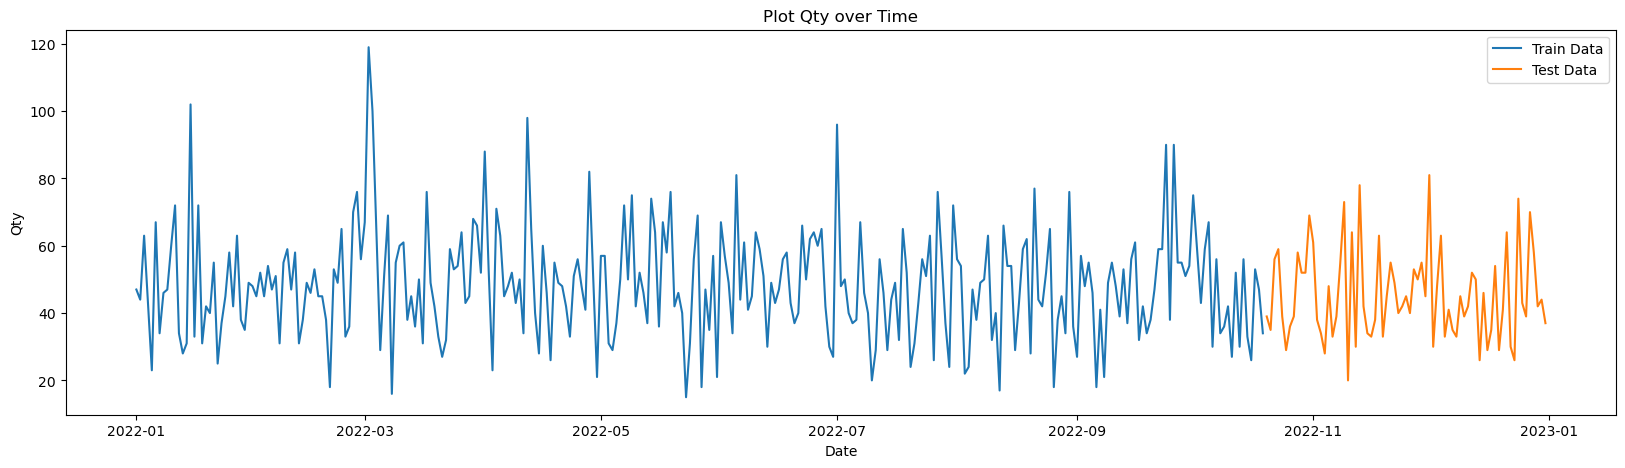

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
sns.lineplot(data=train_data, x='Date', y='Qty', label='Train Data')
sns.lineplot(data=test_data, x='Date', y='Qty', label='Test Data')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.title('Plot Qty over Time')
plt.legend()
plt.show()

In [60]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data['Qty'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -16.65766947707857
p-value: 1.5840670209109724e-29
Critical Values: {'1%': -3.4530232710482367, '5%': -2.871523926671883, '10%': -2.5720897694878424}


Karena nilai p-value kurang dari tingkat signifikansi yang telah ditentukan (biasanya 0.05), maka dapat dikatakan bahwa data bersifat stasioner. Dari grafik juga terlihat bahwa data stasioner.

<Figure size 1200x600 with 0 Axes>

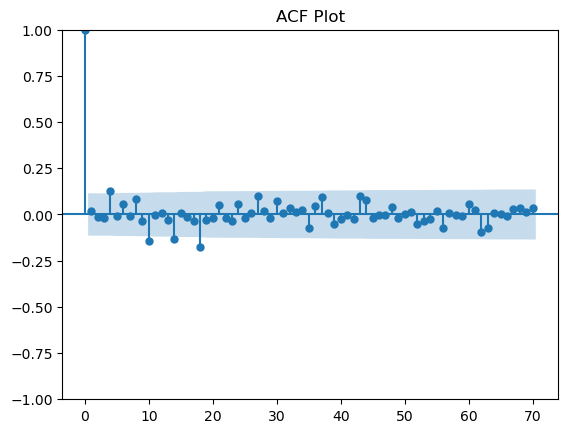

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

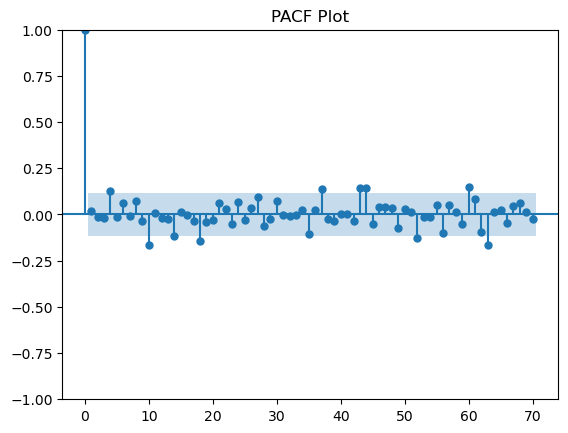

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Menampilkan plot ACF hingga lag 100
plt.figure(figsize=(12, 6))
plot_acf(train_data['Qty'], lags=70)
plt.title('ACF Plot')
plt.show()

# Menampilkan plot PACF hingga lag 100
plt.figure(figsize=(12, 6))
plot_pacf(train_data['Qty'], lags=70)
plt.title('PACF Plot')
plt.show()

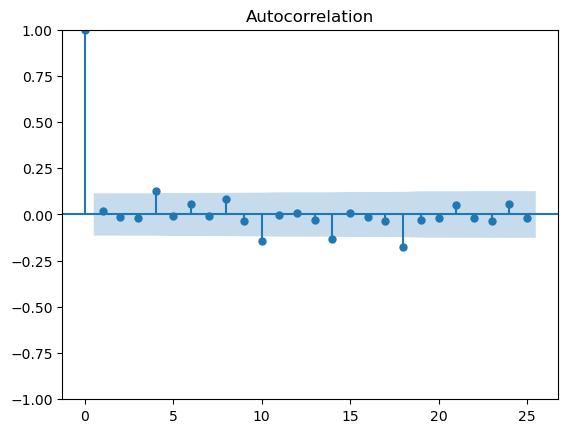

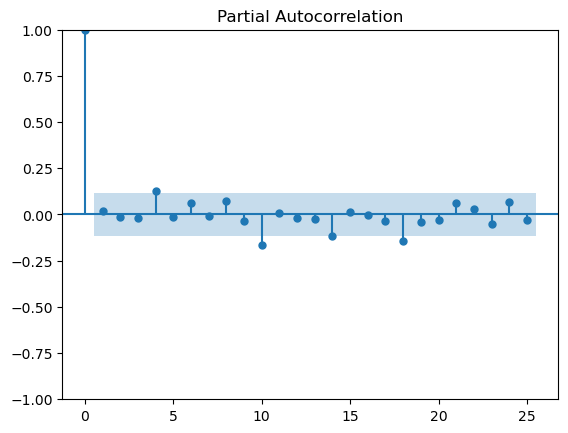

In [62]:
# Menampilkan plot ACF dan PACF
plot_acf(train_data['Qty'])
plot_pacf(train_data['Qty'])
plt.show()

In [63]:
from statsmodels.tsa.arima.model import ARIMA

# Membuat model ARIMA
model = ARIMA(train_data['Qty'], order=(37,0,19))
model_fit = model.fit()

# Menampilkan ringkasan hasil
print(model_fit.summary())

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                  292
Model:               ARIMA(37, 0, 19)   Log Likelihood               -1194.563
Date:                Sun, 01 Oct 2023   AIC                           2505.125
Time:                        15:50:39   BIC                           2718.377
Sample:                             0   HQIC                          2590.545
                                - 292                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.4727      1.368     35.434      0.000      45.791      51.154
ar.L1          0.1090      0.558      0.195      0.845      -0.985       1.203
ar.L2          0.3030      0.530      0.571      0.5

In [64]:
# Melakukan prediksi pada data pengujian
predictions = model_fit.forecast(steps=len(test_data))

In [65]:
predictions

292    58.769991
293    42.386401
294    42.501034
295    64.344400
296    53.928399
         ...    
360    53.126569
361    48.035112
362    47.452751
363    51.030068
364    48.989106
Name: predicted_mean, Length: 73, dtype: float64

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(test_data['Qty'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Menghitung MAE
mae = mean_absolute_error(test_data['Qty'], predictions)
print(f'Mean Absolute Error (MAE): {mae}')

Root Mean Squared Error (RMSE): 14.399749667742176
Mean Absolute Error (MAE): 12.130912748543098


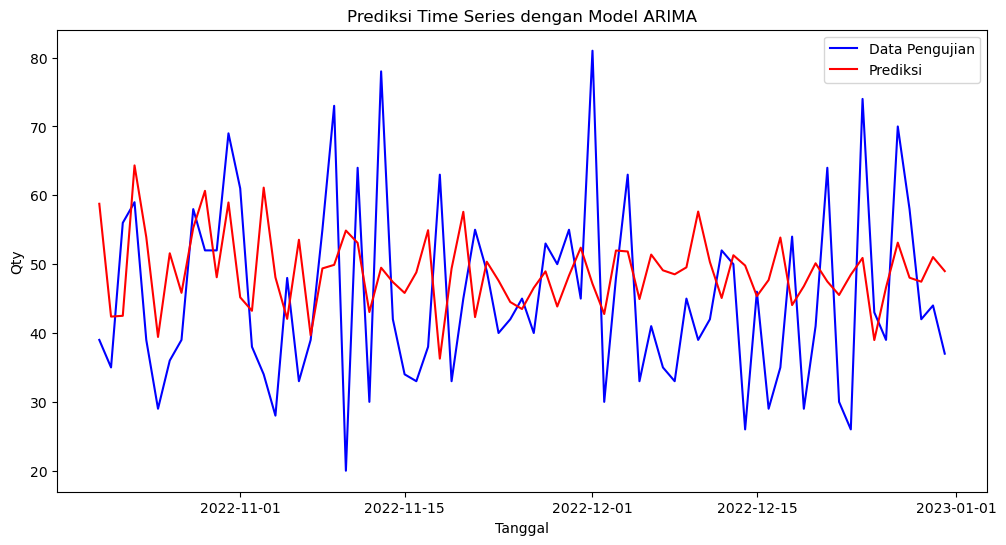

In [67]:
# Menampilkan hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Qty'], label='Data Pengujian', color='blue')
plt.plot(test_data['Date'], predictions, label='Prediksi', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Qty')
plt.title('Prediksi Time Series dengan Model ARIMA')
plt.legend()
plt.show()

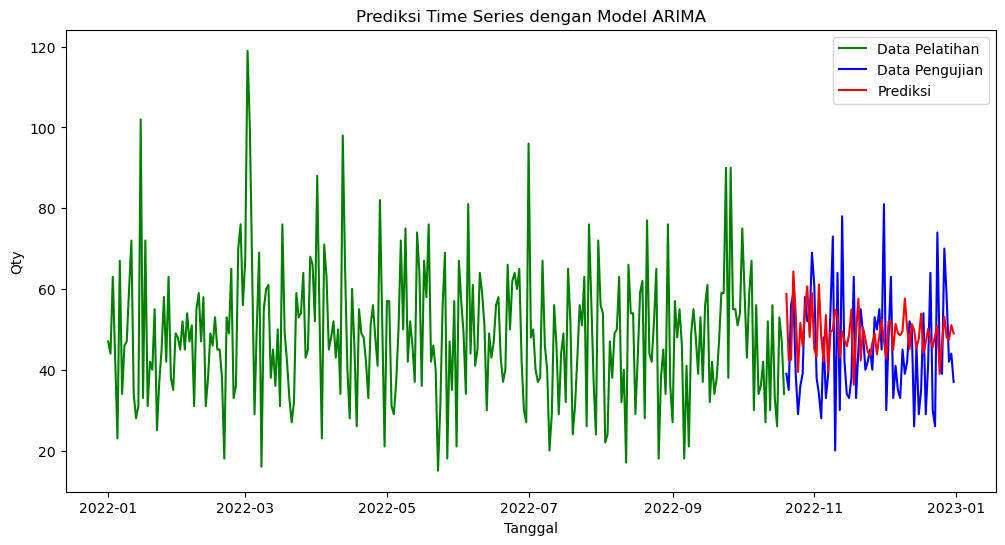

In [68]:
# Menampilkan hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Qty'], label='Data Pelatihan', color='green')
plt.plot(test_data['Date'], test_data['Qty'], label='Data Pengujian', color='blue')
plt.plot(test_data['Date'], predictions, label='Prediksi', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Qty')
plt.title('Prediksi Time Series dengan Model ARIMA')
plt.legend()
plt.show()

In [69]:
# Tanggal-tanggal yang ingin Anda prediksi (contoh: 1 Januari 2023 hingga 5 Januari 2023)
tanggal_prediksi = pd.date_range(start='2023-01-01', end='2023-01-05')

# Melakukan prediksi untuk tanggal-tanggal tersebut
prediksi = model_fit.predict(start=len(train_data), end=len(train_data) + len(tanggal_prediksi) - 1, typ='levels')

# Hasil prediksi
hasil_prediksi = pd.DataFrame({'Date': tanggal_prediksi, 'Qty_Prediction': prediksi})

# Tampilkan hasil prediksi
hasil_prediksi

,Date,Qty_Prediction
292,2023-01-01,58.769991
293,2023-01-02,42.386401
294,2023-01-03,42.501034
295,2023-01-04,64.344400
296,2023-01-05,53.928399


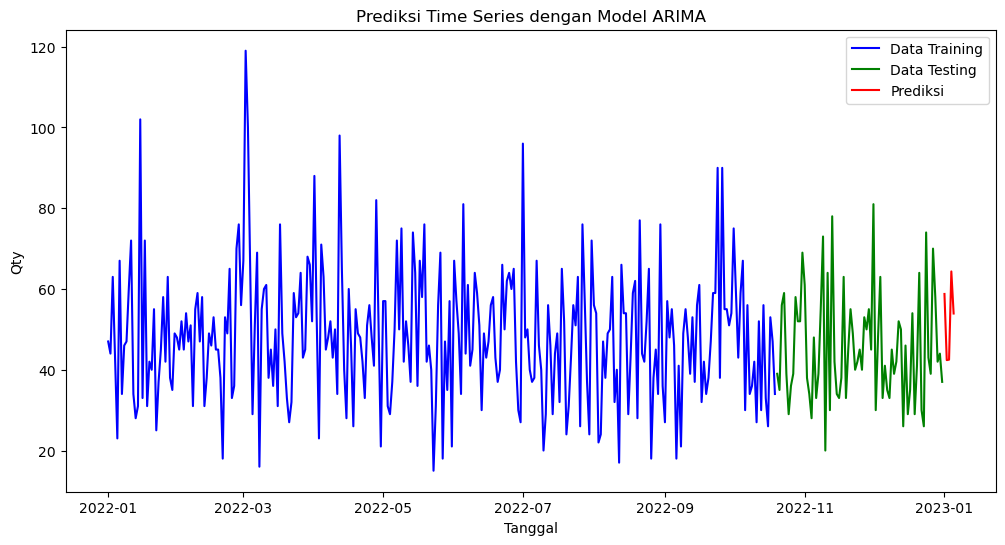

In [70]:
# Tanggal-tanggal yang ingin Anda prediksi (contoh: 1 Januari 2023 hingga 5 Januari 2023)
tanggal_prediksi = pd.date_range(start='2023-01-01', end='2023-01-05')

# Melakukan prediksi untuk tanggal-tanggal tersebut
prediksi = model_fit.predict(start=len(train_data), end=len(train_data) + len(tanggal_prediksi) - 1, typ='levels')

# Hasil prediksi
hasil_prediksi = pd.DataFrame({'Date': tanggal_prediksi, 'Qty_Prediction': prediksi})

# Plot hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Qty'], label='Data Training', color='blue')
plt.plot(test_data['Date'], test_data['Qty'], label='Data Testing', color='green')
plt.plot(hasil_prediksi['Date'], hasil_prediksi['Qty_Prediction'], label='Prediksi', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Qty')
plt.title('Prediksi Time Series dengan Model ARIMA')
plt.legend()
plt.show()

# DATA FOR CLUSTERING

In [71]:
# Groupby 'CustomerID' dan lakukan agregasi
cluster_data = transaction.groupby('CustomerID').agg({
    'TransactionID': 'count', 
    'Qty': 'sum',              
    'TotalAmount': 'sum'       
}).reset_index() 

# Ubah nama kolom agar lebih deskriptif
cluster_data.rename(columns={
    'TransactionID': 'TransactionCount',
    'Qty': 'TotalQty',
    'TotalAmount': 'TotalAmountSum'
}, inplace=True)

# Tampilkan hasilnya
cluster_data

,CustomerID,TransactionCount,TotalQty,TotalAmountSum
0,1,17,60,623300
1,10,14,50,478000
2,100,8,35,272400
3,101,14,44,439600
4,102,15,57,423300
...,...,...,...,...
442,95,12,43,410200
443,96,11,41,342500
444,97,14,36,329500
445,98,8,32,342500


# REMOVE OUTLIER FROM DATA FOR CLUSTERING

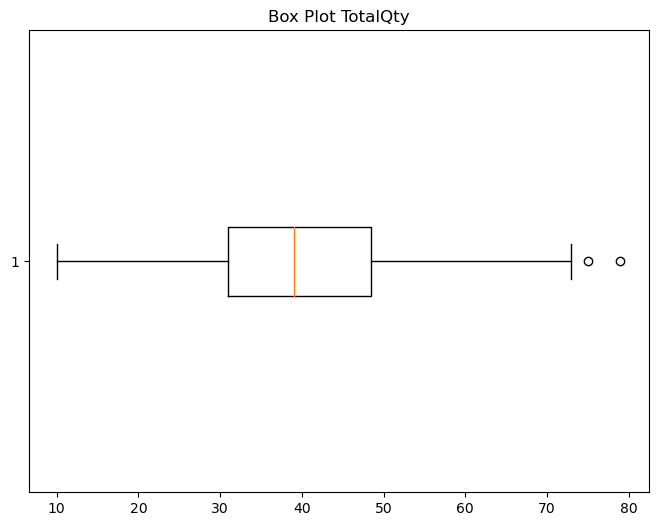

Outlier mg:
    CustomerID  TransactionCount  TotalQty  TotalAmountSum
295        365                20        75          846700
435         89                19        79          760600


In [72]:
Q1_mg = cluster_data['TotalQty'].quantile(0.25)
Q3_mg = cluster_data['TotalQty'].quantile(0.75)

IQR_mg = Q3_mg - Q1_mg

lower_bound_mg = Q1_mg - 1.5 * IQR_mg
upper_bound_mg = Q3_mg + 1.5 * IQR_mg

outliers_mg = cluster_data[(cluster_data['TotalQty'] < lower_bound_mg) | (cluster_data['TotalQty'] > upper_bound_mg)]

plt.figure(figsize=(8, 6))
plt.boxplot(cluster_data['TotalQty'], vert=False)
plt.title('Box Plot TotalQty')
plt.show()

print("Outlier mg:")
print(outliers_mg)

In [73]:
import pandas as pd

# Identifikasi outlier menggunakan IQR
Q1 = cluster_data['TotalQty'].quantile(0.25)
Q3 = cluster_data['TotalQty'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus baris yang mengandung outlier
cluster_data2 = cluster_data[(cluster_data['TotalQty'] >= lower_bound) & (cluster_data['TotalQty'] <= upper_bound)]

In [74]:
cluster_data2

,CustomerID,TransactionCount,TotalQty,TotalAmountSum
0,1,17,60,623300
1,10,14,50,478000
2,100,8,35,272400
3,101,14,44,439600
4,102,15,57,423300
...,...,...,...,...
442,95,12,43,410200
443,96,11,41,342500
444,97,14,36,329500
445,98,8,32,342500


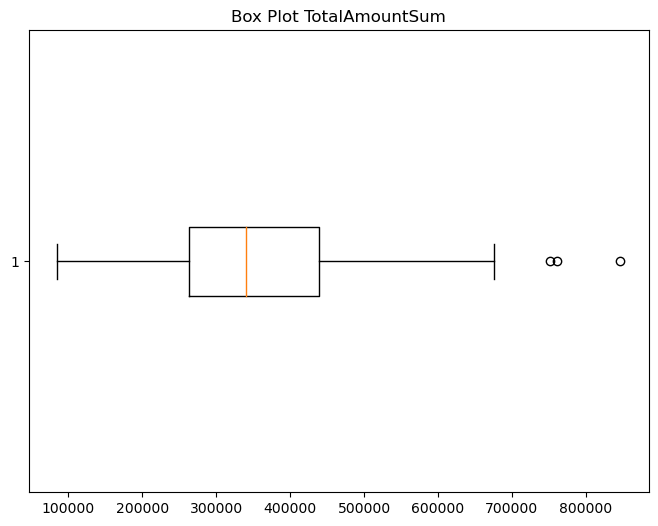

Outlier mg:
    CustomerID  TransactionCount  TotalQty  TotalAmountSum
295        365                20        75          846700
325        392                20        71          751400
435         89                19        79          760600


In [75]:
Q1_mg = cluster_data['TotalAmountSum'].quantile(0.25)
Q3_mg = cluster_data['TotalAmountSum'].quantile(0.75)

IQR_mg = Q3_mg - Q1_mg

lower_bound_mg = Q1_mg - 1.5 * IQR_mg
upper_bound_mg = Q3_mg + 1.5 * IQR_mg

outliers_mg = cluster_data[(cluster_data['TotalAmountSum'] < lower_bound_mg) | (cluster_data['TotalAmountSum'] > upper_bound_mg)]

plt.figure(figsize=(8, 6))
plt.boxplot(cluster_data['TotalAmountSum'], vert=False)
plt.title('Box Plot TotalAmountSum')
plt.show()

print("Outlier mg:")
print(outliers_mg)

Outlier-outlier tersebut akan dihapus agar akurasi model tidak menjadi lebih buruk

In [76]:
import pandas as pd

# Identifikasi outlier menggunakan IQR
Q1 = cluster_data2['TotalAmountSum'].quantile(0.25)
Q3 = cluster_data2['TotalAmountSum'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus baris yang mengandung outlier
cluster_data2 = cluster_data2[(cluster_data2['TotalAmountSum'] >= lower_bound) & (cluster_data2['TotalAmountSum'] <= upper_bound)]

In [77]:
cluster_data2

,CustomerID,TransactionCount,TotalQty,TotalAmountSum
0,1,17,60,623300
1,10,14,50,478000
2,100,8,35,272400
3,101,14,44,439600
4,102,15,57,423300
...,...,...,...,...
442,95,12,43,410200
443,96,11,41,342500
444,97,14,36,329500
445,98,8,32,342500


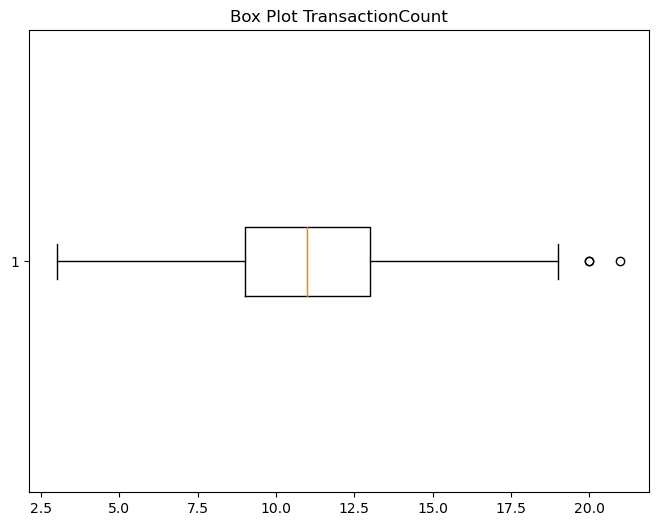

Outlier mg:
    CustomerID  TransactionCount  TotalQty  TotalAmountSum
63         156                21        61          583100
295        365                20        75          846700
325        392                20        71          751400


In [78]:
Q1_mg = cluster_data['TransactionCount'].quantile(0.25)
Q3_mg = cluster_data['TransactionCount'].quantile(0.75)

IQR_mg = Q3_mg - Q1_mg

lower_bound_mg = Q1_mg - 1.5 * IQR_mg
upper_bound_mg = Q3_mg + 1.5 * IQR_mg

outliers_mg = cluster_data[(cluster_data['TransactionCount'] < lower_bound_mg) | (cluster_data['TransactionCount'] > upper_bound_mg)]

plt.figure(figsize=(8, 6))
plt.boxplot(cluster_data['TransactionCount'], vert=False)
plt.title('Box Plot TransactionCount')
plt.show()

print("Outlier mg:")
print(outliers_mg)

In [79]:
import pandas as pd

# Identifikasi outlier menggunakan IQR
Q1 = cluster_data2['TransactionCount'].quantile(0.25)
Q3 = cluster_data2['TransactionCount'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus baris yang mengandung outlier
cluster_data2 = cluster_data2[(cluster_data2['TransactionCount'] >= lower_bound) & (cluster_data2['TransactionCount'] <= upper_bound)]

In [80]:
cluster_data2

,CustomerID,TransactionCount,TotalQty,TotalAmountSum
0,1,17,60,623300
1,10,14,50,478000
2,100,8,35,272400
3,101,14,44,439600
4,102,15,57,423300
...,...,...,...,...
442,95,12,43,410200
443,96,11,41,342500
444,97,14,36,329500
445,98,8,32,342500


In [81]:
cluster_data = cluster_data2

In [82]:
selected_columns = ['TransactionCount', 'TotalQty', 'TotalAmountSum']
cluster_data = cluster_data[selected_columns]

In [83]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Menggunakan scaler untuk melakukan normalisasi pada data
normalized_data = scaler.fit_transform(cluster_data)

# Membuat DataFrame baru dari hasil normalisasi
normalized_df = pd.DataFrame(normalized_data, columns=cluster_data.columns)

# Memeriksa DataFrame yang sudah dinormalisasi
normalized_df

,TransactionCount,TotalQty,TotalAmountSum
0,0.933333,0.793651,0.910627
1,0.733333,0.634921,0.665146
2,0.333333,0.396825,0.317790
3,0.733333,0.539683,0.600270
4,0.800000,0.746032,0.572732
...,...,...,...
438,0.600000,0.523810,0.550600
439,0.533333,0.492063,0.436222
440,0.733333,0.412698,0.414259
441,0.333333,0.349206,0.436222


In [84]:
cluster_data = normalized_df

# K-MEANS CLUSTERING WITH NORMALIZED DATA

Untuk menentukan jumlah cluster di awal akan menggunakan Elbow Method, selanjutnya untuk evaluasinya akan digunakan Silhouette Score dan Davies Bouldin Index

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

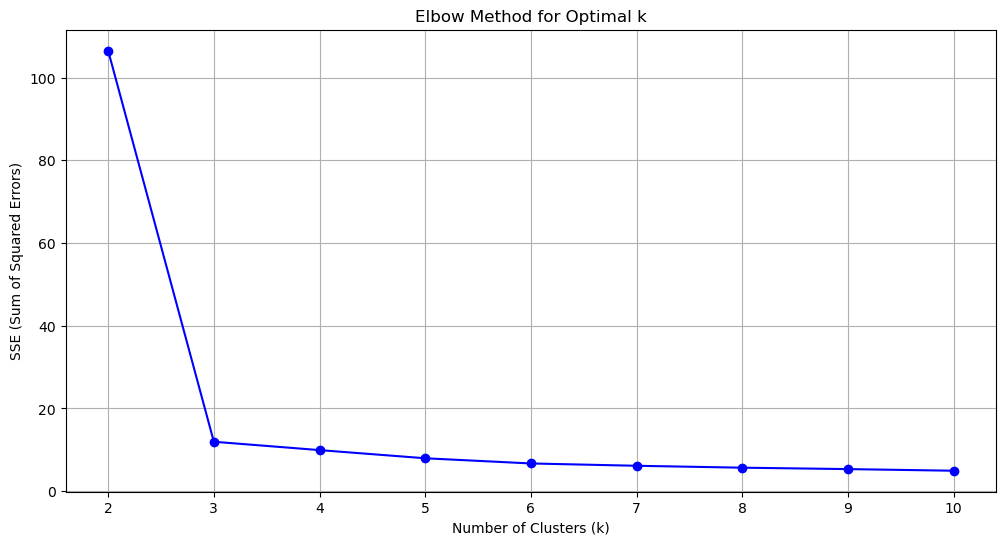

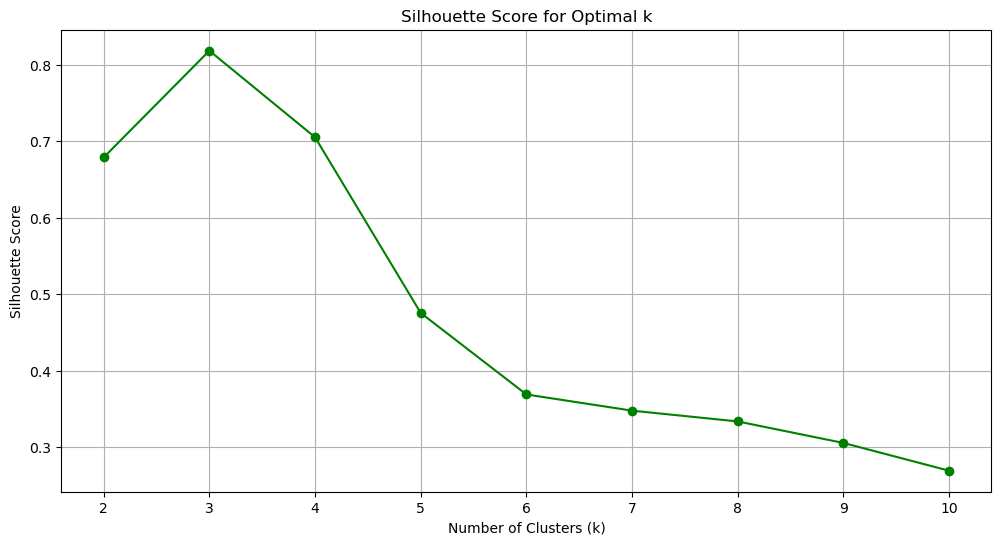

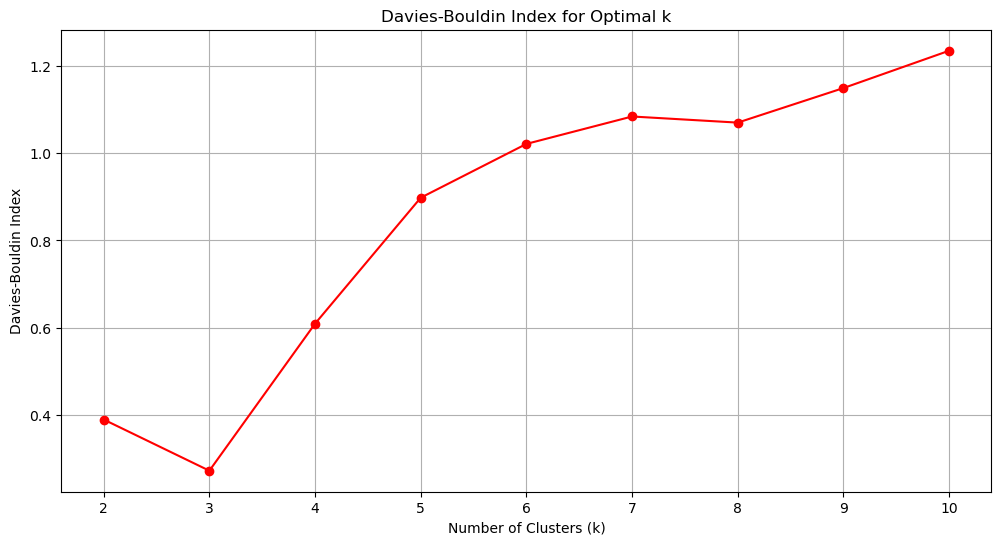

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Anggaplah Anda memiliki DataFrame cluster_data yang sudah disiapkan

# Menyimpan nilai SSE (Sum of Squared Errors) untuk berbagai nilai k
sse = []
silhouette_scores = []
davies_bouldin_scores = []

# Coba nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data)
    
    # Menambahkan SSE ke dalam list
    sse.append(kmeans.inertia_)
    
    # Menghitung silhouette score dan menambahkannya ke dalam list
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(cluster_data, labels)
    silhouette_scores.append(silhouette_avg)
    
    # Menghitung Davies-Bouldin Index dan menambahkannya ke dalam list
    davies_bouldin_avg = davies_bouldin_score(cluster_data, labels)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Menampilkan plot SSE
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), sse, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Menampilkan plot Silhouette Score
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()

# Menampilkan plot Davies-Bouldin Index
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), davies_bouldin_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal k')
plt.grid(True)
plt.show()

In [86]:
from sklearn.cluster import KMeans

# Inisialisasi model K-Means dengan jumlah cluster yang diinginkan (misalnya, 3)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Melakukan clustering pada data
cluster_labels = kmeans.fit_predict(cluster_data)

# Menambahkan kolom cluster_labels ke DataFrame
cluster_data['Cluster'] = cluster_labels

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


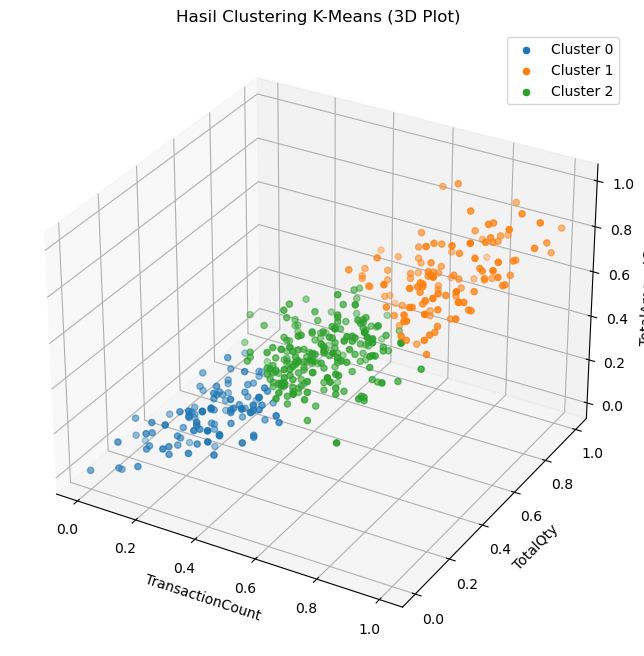

In [87]:
from mpl_toolkits.mplot3d import Axes3D

# Inisialisasi plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot hasil clustering berdasarkan TransactionCount, TotalQty, dan TotalAmountSum
for cluster_num in range(n_clusters):
    cluster = cluster_data[cluster_data['Cluster'] == cluster_num]
    ax.scatter(cluster['TransactionCount'], cluster['TotalQty'], cluster['TotalAmountSum'], label=f'Cluster {cluster_num}')

# Menambahkan label sumbu x, y, dan z
ax.set_xlabel('TransactionCount')
ax.set_ylabel('TotalQty')
ax.set_zlabel('TotalAmountSum')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.title('Hasil Clustering K-Means (3D Plot)')
plt.show()

In [88]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from joblib import Parallel, delayed

# Extract features for clustering
X = cluster_data

# Number of repetitions for stability analysis
num_repeats = 10

# Number of clusters
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Define a function to compute scores for a given cluster number
def compute_scores(num_cluster, X):
    sil_scores_kmeans = []
    sil_scores_gmm = []
    dbi_scores_kmeans_rep = []
    dbi_scores_gmm_rep = []

    for _ in range(num_repeats):
        # Apply K-Means clustering
        kmeans = KMeans(n_clusters=num_cluster, random_state=0)
        kmeans_labels = kmeans.fit_predict(X)
        sil_scores_kmeans.append(silhouette_score(X, kmeans_labels))
        dbi_scores_kmeans_rep.append(davies_bouldin_score(X, kmeans_labels))

        # Apply GMM clustering
        gmm = GaussianMixture(n_components=num_cluster, covariance_type='tied', random_state=0)
        gmm_labels = gmm.fit_predict(X)
        sil_scores_gmm.append(silhouette_score(X, gmm_labels))
        dbi_scores_gmm_rep.append(davies_bouldin_score(X, gmm_labels))

    avg_sil_kmeans = np.mean(sil_scores_kmeans)
    avg_sil_gmm = np.mean(sil_scores_gmm)
    avg_dbi_kmeans = np.mean(dbi_scores_kmeans_rep)
    avg_dbi_gmm = np.mean(dbi_scores_gmm_rep)

    return num_cluster, avg_sil_kmeans, avg_sil_gmm, avg_dbi_kmeans, avg_dbi_gmm

# Use parallel processing to compute scores for different cluster numbers
results = Parallel(n_jobs=-1)(delayed(compute_scores)(num_cluster, X) for num_cluster in num_clusters)

# Print the results
for num_cluster, avg_sil_kmeans, avg_sil_gmm, avg_dbi_kmeans, avg_dbi_gmm in results:
    print(f"Number of Clusters: {num_cluster}")
    print(f"K-Means - Silhouette Score: {avg_sil_kmeans}, Davies-Bouldin Index: {avg_dbi_kmeans}")
    print(f"GMM - Silhouette Score: {avg_sil_gmm}, Davies-Bouldin Index: {avg_dbi_gmm}\n")

Number of Clusters: 2
K-Means - Silhouette Score: 0.6789228034215357, Davies-Bouldin Index: 0.38909360502887724
GMM - Silhouette Score: 0.6789228034215357, Davies-Bouldin Index: 0.38909360502887724

Number of Clusters: 3
K-Means - Silhouette Score: 0.8185772541736418, Davies-Bouldin Index: 0.2716444236747437
GMM - Silhouette Score: 0.8185772541736418, Davies-Bouldin Index: 0.2716444236747437

Number of Clusters: 4
K-Means - Silhouette Score: 0.705346151868694, Davies-Bouldin Index: 0.6089423373720898
GMM - Silhouette Score: 0.7157122601201606, Davies-Bouldin Index: 0.5403467867739217

Number of Clusters: 5
K-Means - Silhouette Score: 0.475424080545113, Davies-Bouldin Index: 0.8979157532621663
GMM - Silhouette Score: 0.6044961806217684, Davies-Bouldin Index: 0.7552579684326606

Number of Clusters: 6
K-Means - Silhouette Score: 0.3688757360482292, Davies-Bouldin Index: 1.0201488649840356
GMM - Silhouette Score: 0.376624307850792, Davies-Bouldin Index: 0.9695908376970828

Number of Cluste

Didapat cluster optimalnya yaitu 3, berdasarkan elbow method, lalu evaluasi menggunakan silhouette score dan davies bouldin index (DBI)

In [89]:
cluster_data

,TransactionCount,TotalQty,TotalAmountSum,Cluster
0,0.933333,0.793651,0.910627,1
1,0.733333,0.634921,0.665146,1
2,0.333333,0.396825,0.317790,0
3,0.733333,0.539683,0.600270,1
4,0.800000,0.746032,0.572732,1
...,...,...,...,...
438,0.600000,0.523810,0.550600,2
439,0.533333,0.492063,0.436222,2
440,0.733333,0.412698,0.414259,2
441,0.333333,0.349206,0.436222,2


# CLUSTER'S INTERPRETATION

Text(0.5, 0, 'Clusters')

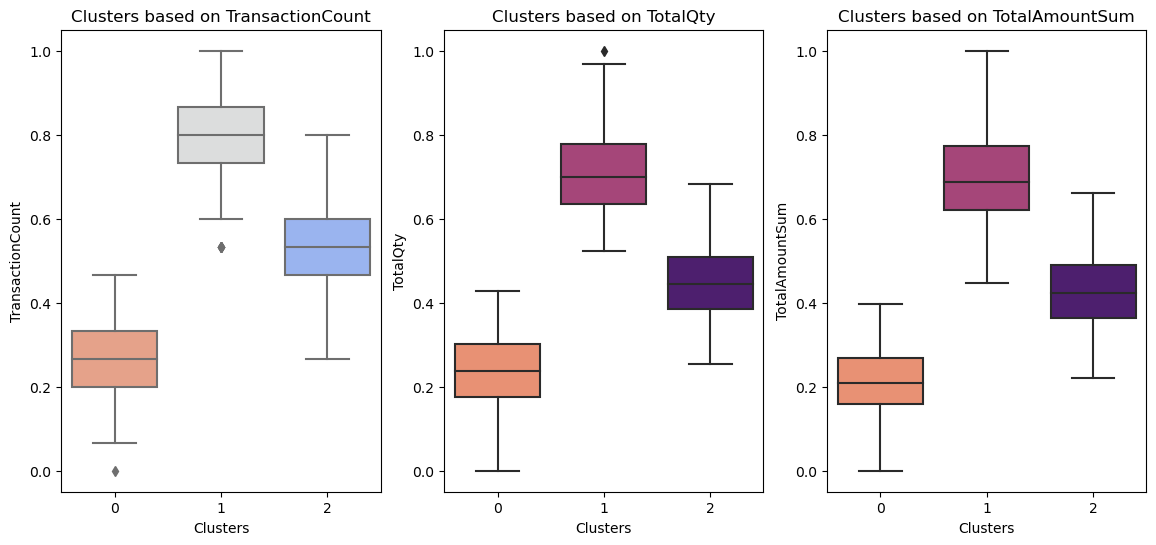

In [90]:
import missingno as msno
import seaborn as sns

fig, ax = plt.subplots(nrows= 1, ncols = 3, figsize= (14,6))
tt=sns.boxplot(x='Cluster', y='TransactionCount', data=cluster_data, ax = ax[0], palette='coolwarm_r')
tt.set_title('Clusters based on TransactionCount')
tt.set_ylabel('TransactionCount')
tt.set_xlabel('Clusters')

tr=sns.boxplot(x='Cluster', y='TotalQty', data=cluster_data, ax = ax[1], palette='magma_r')
tr.set_title('Clusters based on TotalQty')
tr.set_ylabel('TotalQty')
tr.set_xlabel('Clusters')

tm=sns.boxplot(x='Cluster', y='TotalAmountSum', data=cluster_data, ax = ax[2], palette='magma_r')
tm.set_title('Clusters based on TotalAmountSum')
tm.set_ylabel('TotalAmountSum')
tm.set_xlabel('Clusters')

In [91]:
cluster_data2 = cluster_data2.reset_index()

Selanjutnya akan digunakan data sebelum normalisasi untuk interpretasi, lalu ditambahkan kolom "Cluster" ke data nya

In [92]:
# Menggabungkan kolom "Cluster" dari cluster_data ke cluster_data2 berdasarkan indeks
cluster_data2 = cluster_data2.join(cluster_data['Cluster'])

In [93]:
cluster_data2

,index,CustomerID,TransactionCount,TotalQty,TotalAmountSum,Cluster
0,0,1,17,60,623300,1
1,1,10,14,50,478000,1
2,2,100,8,35,272400,0
3,3,101,14,44,439600,1
4,4,102,15,57,423300,1
...,...,...,...,...,...,...
438,442,95,12,43,410200,2
439,443,96,11,41,342500,2
440,444,97,14,36,329500,2
441,445,98,8,32,342500,2


In [94]:
# Menghapus kolom "index" dari DataFrame cluster_data2
cluster_data2.drop('index', axis=1, inplace=True)

In [95]:
cluster_data2

,CustomerID,TransactionCount,TotalQty,TotalAmountSum,Cluster
0,1,17,60,623300,1
1,10,14,50,478000,1
2,100,8,35,272400,0
3,101,14,44,439600,1
4,102,15,57,423300,1
...,...,...,...,...,...
438,95,12,43,410200,2
439,96,11,41,342500,2
440,97,14,36,329500,2
441,98,8,32,342500,2


In [96]:
cluster_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        443 non-null    object
 1   TransactionCount  443 non-null    int64 
 2   TotalQty          443 non-null    int64 
 3   TotalAmountSum    443 non-null    int64 
 4   Cluster           443 non-null    int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 15.7+ KB


In [97]:
# Grouping data berdasarkan kolom "Cluster" dan menghitung statistik
cluster_stats = cluster_data2.groupby('Cluster')[['TransactionCount', 'TotalQty', 'TotalAmountSum']].agg(
    {
        'TransactionCount': ['min', 'max', 'mean', 'var'],
        'TotalQty': ['min', 'max', 'mean', 'var'],
        'TotalAmountSum': ['min', 'max', 'mean', 'var']
    }
)

# Menampilkan hasil statistik
cluster_stats

TransactionCount                          TotalQty                 \
                     min max       mean       var      min max       mean   
Cluster                                                                     
0                      3  10   7.009434  2.104672       10  37  24.669811   
1                     11  18  14.593496  2.800613       43  73  54.926829   
2                      7  15  10.700935  2.097933       26  53  38.327103   

                   TotalAmountSum                                       
               var            min     max           mean           var  
Cluster                                                                 
0        32.089937          84300  319200  207579.245283  2.300582e+09  
1        43.363455         348200  676200  497099.186992  4.434645e+09  
2        26.793910         215100  476200  336869.626168  2.665377e+09

Karena tujuan dari project ini adalah untuk membuat segment customer, dimana customer ini nantinya akan digunakan oleh tim marketing untuk memberikan personalized promotion dan sales treatment.

Oleh karena itu dapat dilihat bahwa dari hasil menggunakan Elbow Method untuk menentukan jumlah cluster diawal, lalu melakukan evaluasi menggunakan Silhouette Score, dan Davies Bouldin Index, didapat bahwa jumlah k = 3 merupakan jumlah klaster optimal pada kasus ini.

Berikut merupakan **interpretasinya**:

**Cluster 0**:

1. Terdiri dari customer dengan rentang TransactionCount antara 3 hingga 10, dengan rata-rata sekitar 7.01.
2. TotalQty berkisar antara 10 hingga 37, dengan rata-rata sekitar 24.67.
3. TotalAmountSum berkisar antara 84,300 hingga 319,200, dengan rata-rata sekitar 207,579.25.
4. Variansi dari setiap atribut dalam cluster ini relatif rendah, menunjukkan bahwa data dalam cluster ini cenderung stabil dan tidak terlalu bervariasi.
5. Cluster ini mungkin dapat disebut sebagai "Customer Reguler" karena memiliki frekuensi transaksi yang lebih rendah dan total pembelian yang lebih kecil dibandingkan dengan cluster lainnya.

**Cluster 1**:

1. Terdiri dari customer dengan rentang TransactionCount antara 11 hingga 18, dengan rata-rata sekitar 14.59.
2. TotalQty berkisar antara 43 hingga 73, dengan rata-rata sekitar 54.93.
3. TotalAmountSum berkisar antara 348,200 hingga 676,200, dengan rata-rata sekitar 497,099.19.
4. Variansi dari setiap atribut dalam cluster ini juga cukup rendah, menunjukkan stabilitas dalam perilaku pembelian.
5. Cluster ini mungkin dapat disebut sebagai "Customer Aktif" karena memiliki frekuensi transaksi yang lebih tinggi dan total pembelian yang lebih besar dibandingkan dengan cluster 0.

**Cluster 2**:

1. Terdiri dari customer dengan rentang TransactionCount antara 7 hingga 15, dengan rata-rata sekitar 10.70.
2. TotalQty berkisar antara 26 hingga 53, dengan rata-rata sekitar 38.33.
3. TotalAmountSum berkisar antara 215,100 hingga 476,200, dengan rata-rata sekitar 336,869.63.
4. Seperti cluster lainnya, variansi dari setiap atribut dalam cluster ini relatif rendah.
5. Cluster ini mungkin dapat disebut sebagai "Customer Menengah" karena memiliki tingkat transaksi dan total pembelian yang berada di tengah-tengah antara cluster 0 dan 1.

Melalui hasil yang didapatkan, tim pemasaran dapat merancang strategi promosi yang lebih sesuai dengan masing-masing jenis customer.

**SARAN**

**Saran untuk Cluster 0 ("Customer Reguler"):**
Cluster ini terdiri dari pengguna dengan frekuensi transaksi yang lebih rendah dan total pembelian yang lebih kecil. Untuk meningkatkan frekuensi transaksi mereka, berikut saran yang dapat dipertimbangkan:

1. **Program Loyalitas:**  
Dengan meluncurkan program loyalitas khusus untuk anggota Cluster 0. Tawarkan imbalan atau insentif seperti diskon eksklusif, cashback, atau poin loyalitas setiap kali mereka berbelanja.

2. **Promosi Berkala:** 
Kirimkan mereka penawaran promosi berkala melalui email atau pesan teks untuk mendorong mereka bertransaksi lebih sering. Selain itu, pastikan promosi ini relevan dengan preferensi dan riwayat pembelian mereka.

3. **Bundle Deals:** 
Tawarkan paket produk dengan harga khusus atau bundel produk yang sering dibeli bersama-sama. Hal ini dapat mendorong pembelian yang lebih besar.

4. **Edukasi Produk:** 
Jika ada produk yang mungkin belum mereka kenal, berikan informasi dan ulasan yang bermanfaat untuk mendorong mereka mencoba produk baru.

**Saran untuk Cluster 1 ("Customer Aktif"):**
Cluster ini memiliki frekuensi transaksi yang lebih tinggi dan total pembelian yang lebih besar. Mereka adalah calon yang baik untuk produk unggulan. Berikut saran yang dapat dipertimbangkan:

1. **Highlight Produk Unggulan:** 
Fokuskan promosi pada produk-produk unggulan yang mungkin menarik bagi merek, termasuk produk dengan margin keuntungan tinggi atau produk yang paling sering dibeli oleh kelompok ini.

2. **Promosi Cross-Selling:** 
Tawarkan produk tambahan atau layanan terkait dengan pembelian mereka saat ini. Contohnya, jika mereka membeli oat, maka bisa dilakukan penawaran untuk membeli yoghurt atau susu juga sebagai pilihan sarapan sehat.

3. **Program Reward Tier:** 
Buat program reward dengan tingkat. Semakin banyak mereka berbelanja, semakin banyak hadiah atau keuntungan yang mereka dapatkan.

4. **Pelayanan Customer Unggulan:** 
Berikan pelayanan customer yang paling unggul kepada anggota Cluster 1. Pastikan mereka merasa dihargai dan mendapatkan respon yang cepat terhadap pertanyaan atau masalah mereka.

5. **Promosi Eksklusif:** 
Tawarkan akses eksklusif ke penjualan atau acara khusus yang tidak tersedia untuk umum, karena hal ini dapat membuat mereka merasa istimewa.

**Saran untuk Cluster 2 ("Customer Menengah"):**
Cluster ini berada di tengah-tengah dalam hal frekuensi transaksi dan total pembelian. Berikut saran yang dapat dipertimbangkan:

1. **Program Diskon Bertahap:** 
Buat program diskon atau cashback dengan tingkat yang berkembang seiring dengan frekuensi transaksi. Semakin sering mereka berbelanja, semakin banyak diskon yang mereka dapatkan.

2. **Bundel Produk:** 
Tawarkan bundel produk dengan harga khusus yang menggabungkan produk yang sering dibeli bersama-sama oleh anggota Cluster 2.

3. **Rekomendasi Produk Personalisasi:** 
Gunakan data pembelian mereka untuk memberikan rekomendasi produk yang sangat relevan dalam komunikasi pemasaran Anda.

4. **Promosi Tematik:** 
Sesuaikan promosi dengan musim atau acara khusus. Misalnya, promosikan produk musiman atau penawaran liburan.

5. **Feedback Loop:** 
Selalu berkomunikasi dengan anggota Cluster 2 untuk mendengar pendapat mereka tentang produk dan layanan. Umpan balik mereka dapat membantu untuk memperbaiki pengalaman mereka terhadap pembelian produk di toko kita.

Hal ini merupakan saran umum, dan penting untuk terus memantau dan mengevaluasi respons customer terhadap strategi-promosi yang selanjutnya akan diterapkan. Penggunaan metode seperti Market Basket Analysis akan sangat berguna untuk menganalisis pola pembelian customer dan mengidentifikasi produk yang sering dibeli bersamaan. Dengan menerapkan analisis ini dapat memberikan wawasan yang lebih dalam tentang hubungan antara produk dan mengidentifikasi peluang cross-selling yang lebih efektif.

**THANK YOU :)**